# Identificação dos picos R

In [18]:
import numpy as np
import pandas as pd
import pywt
import seaborn as sns

from scipy.signal import gaussian, decimate
from scipy.sparse import csr_matrix

from operator import itemgetter

from matplotlib import pyplot as plt

In [19]:
r_peaks_file = '101'
df = pd.read_csv(f'data/kaggle/{r_peaks_file}.csv')

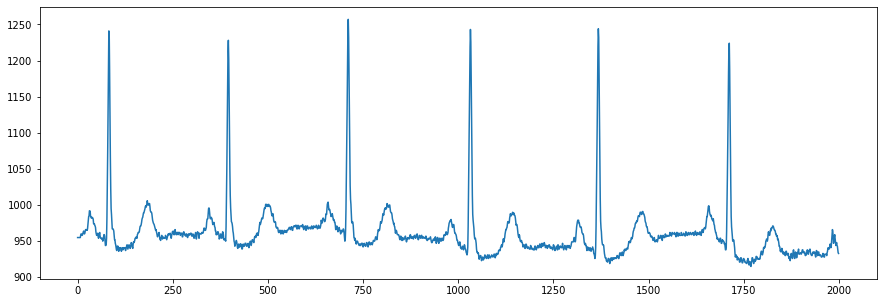

In [20]:
df["'MLII'"][:2000].plot(figsize=(15,5))

In [21]:
#wavelet_res = pywt.swt(df["'MLII'"], wavelet = "db1", level=4, start_level=0, axis=-1)
wavelet_res = pywt.swt(df["'MLII'"], wavelet = "bior1.5", level=4, start_level=0, axis=-1)

In [22]:
wlt_lvl4 = pd.DataFrame(wavelet_res[3][1])

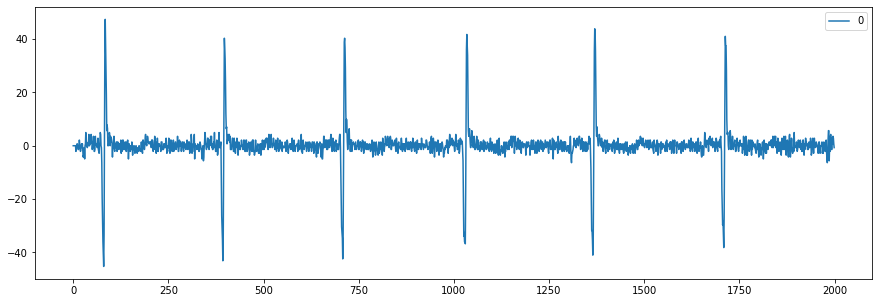

In [23]:
wlt_lvl4[:2000].plot(figsize=(15,5))

In [24]:
wlt_lvl4_2 = wlt_lvl4.copy()**2

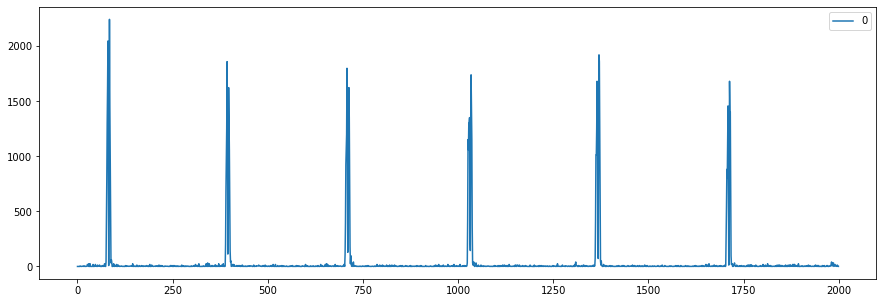

In [25]:
wlt_lvl4_2[:2000].plot(figsize=(15,5))

In [26]:
cut_edge = wlt_lvl4_2[0].std()
cut_edge

298.8062321960199

In [27]:
wvlt_cut = wlt_lvl4_2[0].clip(cut_edge)

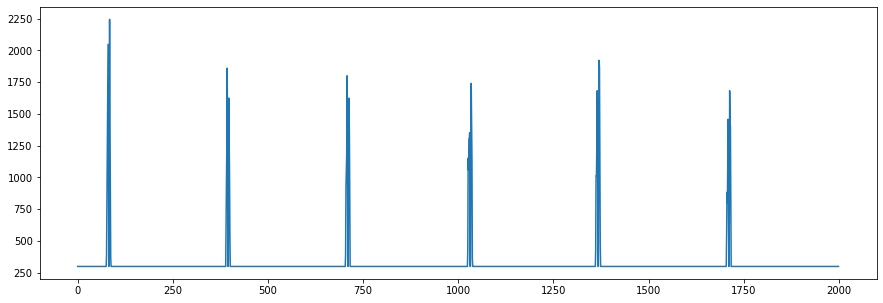

In [28]:
wvlt_cut[:2000].plot(figsize=(15,5))

In [29]:
wvlt_cut = wvlt_cut - cut_edge

In [30]:
peak = []
mem_point = 0

window_r_peak_delimiter = 50
window_counter = 0
windows_relevant_poits = []

for i in range(len(wvlt_cut)):
    point = wvlt_cut[i]
    
    if point > 0 and window_counter == 0:
        window_counter = 1
        
    if window_counter >= 1 and window_counter <= window_r_peak_delimiter:
        window_counter += 1
        windows_relevant_poits.append((i, point))
    elif window_counter > window_r_peak_delimiter:
        window_counter = 0
        
        # Pego apenas o maior ponto disponivel em uma janela de 50 pontos, esse ponto será a onda R
        peak.append(max(windows_relevant_poits,key=itemgetter(1))[0])
        windows_relevant_poits = []
        

In [31]:
peak

[84,
 393,
 708,
 1034,
 1370,
 1713,
 2037,
 2346,
 2659,
 2974,
 3303,
 3627,
 3957,
 4280,
 4606,
 4929,
 5237,
 5565,
 5895,
 6220,
 6525,
 6827,
 7139,
 7459,
 7783,
 8102,
 8411,
 8718,
 9023,
 9317,
 9625,
 9950,
 10278,
 10591,
 10889,
 11186,
 11254,
 11326,
 11386,
 11467,
 11525,
 11756,
 12046,
 12339,
 12623,
 12912,
 13185,
 13458,
 13737,
 14027,
 14330,
 14637,
 14725,
 14760,
 14811,
 14920,
 15192,
 15470,
 15757,
 16048,
 16348,
 16652,
 16953,
 17247,
 17529,
 17811,
 18095,
 18392,
 18684,
 18973,
 19264,
 19555,
 19857,
 20174,
 20495,
 20819,
 21162,
 21500,
 21805,
 22127,
 22448,
 22779,
 23128,
 23454,
 23776,
 24087,
 24405,
 24717,
 25041,
 25370,
 25701,
 26005,
 26306,
 26634,
 26964,
 27300,
 27623,
 27936,
 28240,
 28555,
 28858,
 29152,
 29464,
 29779,
 30085,
 30388,
 30685,
 30982,
 31307,
 31631,
 31949,
 32263,
 32567,
 32863,
 33167,
 33470,
 33770,
 34086,
 34393,
 34674,
 34976,
 35291,
 35595,
 35913,
 36218,
 36526,
 36834,
 37138,
 37446,
 377

In [32]:
R_wave_point_fix = []
R_wave_values_original_fix = []

for i in peak:
    R_wave_point_fix.append(df["'MLII'"][i-13:i+5].idxmax())
    R_wave_values_original_fix.append(df["'MLII'"][i-13:i+5].max())

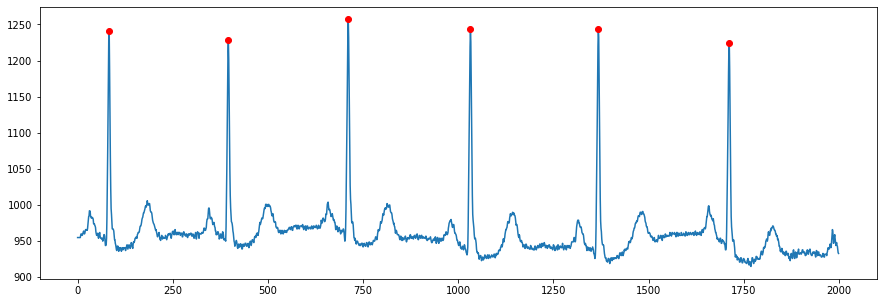

In [33]:
fig = plt.figure(figsize=(15,5))
plt.plot(df["'MLII'"][:2000].values)
plt.plot(R_wave_point_fix[:6], R_wave_values_original_fix[:6], 'ro')
plt.show()

In [34]:
Q_wave_point_fix = []
Q_wave_values_original_fix = []

qs_window = 20

for i in R_wave_point_fix:
    if i < qs_window:
        continue
    Q_wave_point_fix.append(df["'MLII'"][i-qs_window:i+1].idxmin())
    Q_wave_values_original_fix.append(df["'MLII'"][i-qs_window:i+1].min())
    
# Utilizo a mesma regra de correção para identificar a onda S
S_wave_point_fix = []
S_wave_values_original_fix = []

for i in R_wave_point_fix:
    if i < qs_window:
        continue
    S_wave_point_fix.append(df["'MLII'"][i:i+qs_window].idxmin())
    S_wave_values_original_fix.append(df["'MLII'"][i:i+qs_window].min())

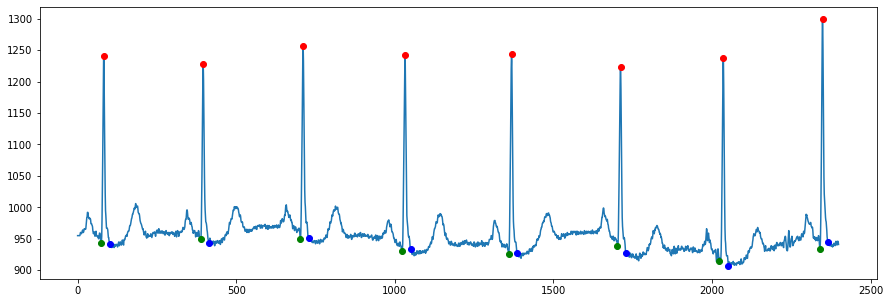

In [37]:
fig = plt.figure(figsize=(15,5))
plt.plot(df["'MLII'"][:2400].values)
plt.plot(R_wave_point_fix[:8], R_wave_values_original_fix[:8], 'ro')
plt.plot(Q_wave_point_fix[:8], Q_wave_values_original_fix[:8], 'go')
plt.plot(S_wave_point_fix[:8], S_wave_values_original_fix[:8], 'bo')
plt.show()

In [40]:
def return_annotation_df(file):
    annotation = []
    annotation_aux = []
    header = []
    
    # Leio o arquivo .txt com as anotações
    time_tp = (0,12)
    sample_tp = (12, 21)
    type_beat_tp = (21, 27)
    sub_tp = (27, 32)
    chan_tp = (32, 37)
    num_tp = (37, 42)
    aux_tp = (42, 0)
    
    with open('data/kaggle/'+file+'annotations.txt') as f:
        annotation_text = f.readlines()

    for text in annotation_text:
        annotation_aux.append(text[time_tp[0]:time_tp[1]].strip())
        annotation_aux.append(text[sample_tp[0]:sample_tp[1]].strip())
        annotation_aux.append(text[type_beat_tp[0]:type_beat_tp[1]].strip())
        annotation_aux.append(text[sub_tp[0]:sub_tp[1]].strip())
        annotation_aux.append(text[chan_tp[0]:chan_tp[1]].strip())
        annotation_aux.append(text[num_tp[0]:num_tp[1]].strip())
        annotation_aux.append(text[aux_tp[0]:].replace('\t', '').replace('\n', '').strip())

        if len(header) < 1:
            header = annotation_aux.copy()
        else:
            annotation.append(annotation_aux)
        annotation_aux = []
    
    # Gero um DataFrame com as anotações
    annotations_df = pd.DataFrame(annotation, columns=header)
    annotations_df['Sample #'] = pd.to_numeric(annotations_df['Sample #'])
    
    return annotations_df

In [41]:
file_notations = return_annotation_df(r_peaks_file)

In [42]:
r_peaks_dataset = file_notations["Sample #"].values
r_values_dataset = []
for i in r_peaks_dataset:
    r_values_dataset.append(df["'MLII'"][i])

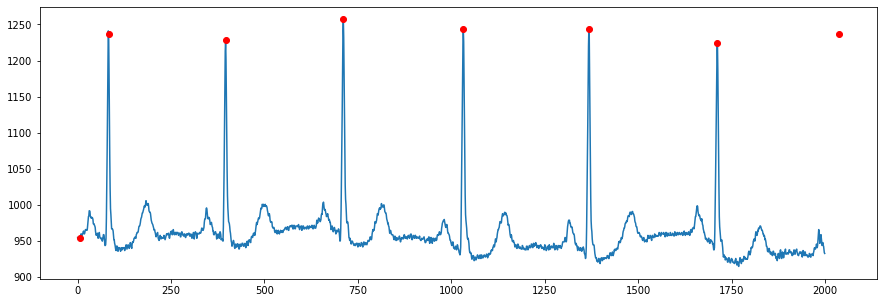

In [43]:
fig = plt.figure(figsize=(15,5))
plt.plot(df["'MLII'"][:2000].values)
plt.plot(r_peaks_dataset[:8], r_values_dataset[:8], 'ro')
plt.show()

In [44]:
r_peaks_dataset = list(r_peaks_dataset)
r_peaks_dataset

[7,
 83,
 396,
 711,
 1032,
 1368,
 1712,
 2036,
 2349,
 2662,
 2972,
 3301,
 3631,
 3960,
 4283,
 4609,
 4928,
 5241,
 5569,
 5898,
 6223,
 6528,
 6830,
 7143,
 7463,
 7786,
 8105,
 8414,
 8721,
 9026,
 9321,
 9628,
 9953,
 10281,
 10590,
 10892,
 11185,
 11470,
 11760,
 12050,
 12338,
 12621,
 12911,
 13183,
 13457,
 13740,
 14030,
 14333,
 14640,
 14923,
 15195,
 15474,
 15760,
 16051,
 16351,
 16655,
 16956,
 17250,
 17532,
 17814,
 18099,
 18396,
 18687,
 18977,
 19267,
 19558,
 19860,
 20173,
 20493,
 20822,
 21166,
 21498,
 21808,
 22130,
 22451,
 22782,
 23126,
 23457,
 23774,
 24090,
 24404,
 24720,
 25040,
 25374,
 25704,
 26008,
 26310,
 26637,
 26967,
 27303,
 27621,
 27934,
 28243,
 28559,
 28861,
 29155,
 29467,
 29782,
 30088,
 30387,
 30688,
 30985,
 31310,
 31634,
 31947,
 32262,
 32565,
 32866,
 33165,
 33467,
 33777,
 34092,
 34391,
 34679,
 34980,
 35288,
 35598,
 35912,
 36217,
 36529,
 36837,
 37141,
 37450,
 37773,
 38099,
 38430,
 38748,
 39059,
 39376,
 39692,


In [45]:
R_wave_point_fix

[82,
 396,
 711,
 1032,
 1368,
 1712,
 2036,
 2349,
 2661,
 2972,
 3301,
 3630,
 3960,
 4283,
 4609,
 4928,
 5240,
 5568,
 5898,
 6222,
 6527,
 6830,
 7142,
 7462,
 7785,
 8105,
 8414,
 8721,
 9025,
 9320,
 9628,
 9953,
 10281,
 10589,
 10891,
 11184,
 11256,
 11328,
 11388,
 11470,
 11524,
 11759,
 12049,
 12338,
 12621,
 12911,
 13183,
 13457,
 13740,
 14029,
 14333,
 14640,
 14727,
 14759,
 14810,
 14923,
 15195,
 15473,
 15760,
 16051,
 16350,
 16655,
 16956,
 17250,
 17531,
 17813,
 18098,
 18395,
 18687,
 18976,
 19267,
 19558,
 19860,
 20173,
 20493,
 20821,
 21165,
 21498,
 21808,
 22130,
 22451,
 22781,
 23126,
 23457,
 23774,
 24089,
 24403,
 24720,
 25040,
 25373,
 25704,
 26008,
 26309,
 26637,
 26967,
 27303,
 27621,
 27933,
 28243,
 28558,
 28861,
 29154,
 29467,
 29781,
 30088,
 30386,
 30687,
 30984,
 31309,
 31634,
 31947,
 32262,
 32565,
 32866,
 33164,
 33467,
 33774,
 34090,
 34390,
 34678,
 34979,
 35288,
 35598,
 35911,
 36216,
 36529,
 36836,
 37140,
 37449,
 377

In [46]:
hits = 0
miss = 0

for i in R_wave_point_fix:
    retry = 3
    hit = False
    
    while retry > -4:
        try:
            r_peaks_dataset.index(i+retry)
            hit = True
            break
        except:   
            retry -= 1
    
    if hit:
        hits += 1
    else:
        miss += 1

In [47]:
# Número de acertos
hits

1864

In [49]:
# Número de erros
miss

50

In [50]:
hits = 0
miss = 0

for i in r_peaks_dataset:
    retry = 3
    hit = False
    
    while retry > -4:
        try:
            R_wave_point_fix.index(i+retry)
            hit = True
            break
        except:   
            retry -= 1
    
    if hit:
        hits += 1
    else:
        miss += 1

In [51]:
hits

1864

In [52]:
miss

10

# Função que identifica as ondas R para todos os arquivos disponíveis

In [53]:
total_final_results = []

ecg_files = ['101', 
             '106', 
             '108', 
             '109', 
             '112', 
             '114', 
             '115', 
             '116', 
             '118', 
             '119', 
             '122', 
             '124', 
             '201', 
             '203', 
             '205', 
             '207', 
             '208', 
             '209', 
             '215', 
             '220', 
             '223', 
             '230',
             '100', 
             '103', 
             '105', 
             '111', 
             '113', 
             '117', 
             '121', 
             '123', 
             '200', 
             '202', 
             '210', 
             '212', 
             '213', 
             '214', 
             '219', 
             '221', 
             '222', 
             '228', 
             '231', 
             '232', 
             '233', 
             '234']
             
def process_ecg_data(ecg_files):
    
    for r_peaks_file in ecg_files:
        print(r_peaks_file)
        df = pd.read_csv(f'data/kaggle/{r_peaks_file}.csv')
        
        wavelet_res = pywt.swt(df["'MLII'"], wavelet = "bior1.5", level=4, start_level=0, axis=-1)
        wlt_lvl4 = pd.DataFrame(wavelet_res[3][1])
        wlt_lvl4_2 = wlt_lvl4.copy()**2
        
        cut_edge = wlt_lvl4_2[0].std()
        wvlt_cut = wlt_lvl4_2[0].clip(cut_edge)
        wvlt_cut = wvlt_cut - cut_edge

        peak = []
        mem_point = 0

        window_r_peak_delimiter = 50
        window_counter = 0
        windows_relevant_poits = []

        for i in range(len(wvlt_cut)):
            point = wvlt_cut[i]

            if point > 0 and window_counter == 0:
                window_counter = 1

            if window_counter >= 1 and window_counter <= window_r_peak_delimiter:
                window_counter += 1
                windows_relevant_poits.append((i, point))
            elif window_counter > window_r_peak_delimiter:
                window_counter = 0

                # Pego apenas o maior ponto disponivel em uma janela de 50 pontos, esse ponto será a onda R
                peak.append(max(windows_relevant_poits,key=itemgetter(1))[0])
                windows_relevant_poits = []

        R_wave_point_fix = []
        R_wave_values_original_fix = []

        for i in peak:
            if i < 13:
                continue
            R_wave_point_fix.append(df["'MLII'"][i-13:i+5].idxmax())
            R_wave_values_original_fix.append(df["'MLII'"][i-13:i+5].max())

        Q_wave_point_fix = []
        Q_wave_values_original_fix = []

        qs_window = 20

        for i in R_wave_point_fix:
            if i < qs_window:
                continue
            Q_wave_point_fix.append(df["'MLII'"][i-qs_window:i+1].idxmin())
            Q_wave_values_original_fix.append(df["'MLII'"][i-qs_window:i+1].min())

        # Utilizo a mesma regra de correção para identificar a onda S
        S_wave_point_fix = []
        S_wave_values_original_fix = []

        for i in R_wave_point_fix:
            if i < qs_window:
                continue
            S_wave_point_fix.append(df["'MLII'"][i:i+qs_window].idxmin())
            S_wave_values_original_fix.append(df["'MLII'"][i:i+qs_window].min())
            
        
        file_notations = return_annotation_df(r_peaks_file)
        
        r_peaks_dataset = file_notations["Sample #"].values
        r_values_dataset = []
        for i in r_peaks_dataset:
            r_values_dataset.append(df["'MLII'"][i])
            
        r_peaks_dataset = list(r_peaks_dataset)

        hits = 0
        miss = 0

        for i in R_wave_point_fix:
            retry = 3
            hit = False

            while retry > -4:
                try:
                    r_peaks_dataset.index(i+retry)
                    hit = True
                    break
                except:   
                    retry -= 1

            if hit:
                hits += 1
            else:
                miss += 1
                
        total_final_results.append([r_peaks_file, hits, miss])
    
    return total_final_results
        
total_final_results = process_ecg_data(ecg_files)       

101
106
108
109
112
114
115
116
118
119
122
124
201
203
205
207
208
209
215
220
223
230
100
103
105
111
113
117
121
123
200
202
210
212
213
214
219
221
222
228
231
232
233
234


In [54]:
total_final_results_df = pd.DataFrame(total_final_results, columns=['arquivo','acertos','erros'])
total_final_results_df

,arquivo,acertos,erros
0,101,1864,50
1,106,1860,71
2,108,886,3045
3,109,2485,84
4,112,2549,78
5,114,1835,85
6,115,1952,0
7,116,2390,7
8,118,2274,66
9,119,1546,441


# Resultados gerais da análise

Após aplicar o algoritmo para toda a base foi analisado se a onda R encontrada estava no intervalo de -4 ou +4 pontos da onda R original. Se sim consideramos um acerto.


In [61]:
print(f"Média de acerto por arquivo: {total_final_results_df['acertos'].mean()}")
print(f"Total de acertos: {total_final_results_df['acertos'].sum()}")
print('------------------------------------')
print(f"Média de erro por arquivo: {total_final_results_df['erros'].mean()}")
print(f"Total de erros: {total_final_results_df['erros'].sum()}")
print('------------------------------------')
print(f"Porcentagem de acerto: {total_final_results_df['acertos'].sum()/(total_final_results_df['acertos'].sum()+total_final_results_df['erros'].sum())*100}")
      

Média de acerto por arquivo: 2031.7045454545455
Total de acertos: 89395
------------------------------------
Média de erro por arquivo: 412.1136363636364
Total de erros: 18133
------------------------------------
Porcentagem de acerto: 83.13648538055205


In [120]:
pd.DataFrame(total_final_results).to_csv("final_results_encontrar_curva_r.csv")